# ReadMe
---
## Instructions
Your assignment is to fill in the portions of the univariate Linear Regression code that are missing with a TODO comment attached to them. This includes parameter estimation, prediction, and performance metric calculation/visualization. There is a dataset provided that the code is already setup to read, but you are allowed to utilize a dataset of your choosing if you would like. There is no associated write up necessary.

### Import

In [106]:
import math
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import random

### Constants

In [32]:
TRAIN_DATA_FILE = "reg_train.csv"
SPLIT_PERC = 0.2

### Function Declarations

In [33]:
#read the train file and return the data as two lists (ind and dep variables)
def readData(fname):
    names = ["feature", "prediction"]
    df = pandas.read_csv(fname, names = names)
    x = df[[names[0]]].to_numpy()
    x = x.reshape(x.shape[0],1)

    y = df[[names[1]]].to_numpy()
    y = y.reshape(x.shape[0],1)

    return train_test_split(x, y, test_size=SPLIT_PERC)

In [43]:
def predict(params, x):
    return (params[1]*x+params[0])

In [44]:
def printParams(params):
    print("The value of B0 (intercept) is: ", params[0])
    print("The value of B1 (slope) is: ", params[1])

In [45]:
#The linear regression algorithm. Takes a list of lists as input
def lreg(x,y):
    params = []
    b = 0.0 # b0
    m = 0.0 # b1
    
    m_x = 0.0
    m_y = 0.0
    m_xy = 0.0
    m_x2 = 0.0
    
    for i in range(0, len(x)):
        m_x += x[i]
        m_y += y[i]
        m_xy += x[i]*y[i]
        m_x2 += x[i]**2
    
    m_x /= len(x)
    m_y /= len(x)
    m_xy /= len(x)
    m_x2 /= len(x)
    
    m = (m_x*m_y-m_xy)/(m_x**2-m_x2)
    b = m_y-m*m_x

    params.append(b)
    params.append(m)
    return params

### Main Routine

In [46]:
# this is the main routine of the program. You should not have to modify anything here
if __name__ == "__main__":
    xTrain, xTest, yTrain, yTest = readData(TRAIN_DATA_FILE)
    parameters = lreg(xTrain,yTrain)
    printParams(parameters)

    #TODO Validation metrics and visualization
    #SciKit Learn and matplotlib.pyplot functions OK here

The value of B0 (intercept) is:  [3.73334895]
The value of B1 (slope) is:  [-0.11598388]


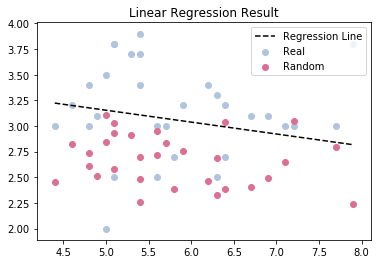

In [116]:
lineX = [min(xTest), max(xTest)]
lineY = [predict(parameters, min(xTest)), predict(parameters, max(xTest))]
randomY = [((random()+min(yTrain))%max(yTrain)) for i in range(0, len(xTest))]

plt.scatter(xTest, yTest, c=["lightsteelblue"], label="Real")
plt.scatter(xTest, randomY, c=["palevioletred"], label="Random")
plt.plot(lineX, lineY, 'k--', label='Regression Line')
    
plt.title('Linear Regression Result')
plt.legend(loc=1)
plt.show()

print()

In [131]:
Reg = 0
Random = 0

errorReg = []
errorRand = []

for i in range(0, len(xTest)):    
    errorReg.append(float(abs(predict(parameters, xTest[i])-yTest[i])))
    errorRand.append(float(abs(((random()+min(yTrain))%max(yTrain))-yTest[i])))
    
    if(errorRand[i] > errorReg[i]):
        Random+=1
    elif(errorRand[i] < errorReg[i]):
        Reg+=1

print("Number of times Random was closer vs number of times Linear Regression was closer")
print("Random:", Reg, "- Linear Regression:", Random, "\n")

print("Average error of Random vs average error of Linear Regression")
print("Random:", sum(errorRand)/len(xTest), "- Linear Regression:", sum(errorReg)/len(xTest))


Number of times Random was closer vs number of times Linear Regression was closer
Random: 12 - Linear Regression: 18 

Average error of Random vs average error of Linear Regression
Random: 0.5954942724934057 - Linear Regression: 0.3663041715792659
